# Importing Necessary Libraries

In [29]:
! pip install astroNN
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
images, labels = galaxy10.load_data()

C:\Users\First One\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [4]:
def print_unique_image_shapes(images):
  unique_shapes = set(image.shape for image in images)
  if len(unique_shapes) == 1:
    print("All images have the same shape:", unique_shapes.pop())
  else:
    print("Unique image shapes:")
    for shape in unique_shapes:
      print(f"-", shape)
print_unique_image_shapes(images)

All images have the same shape: (256, 256, 3)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [34]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [35]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_val = x_val.astype('float32')
y_val = y_val.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [36]:
num_classes = len(np.unique(y_train))

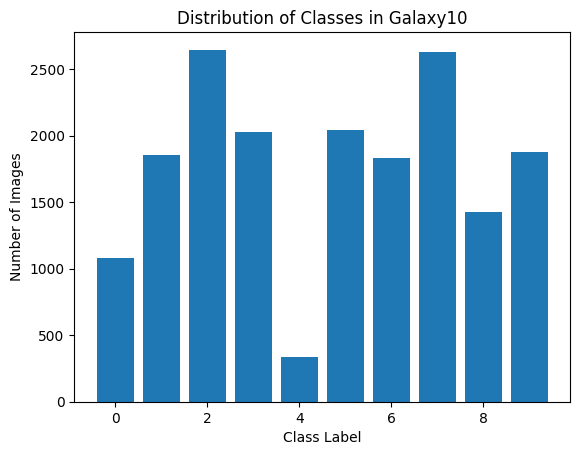

In [10]:
class_counts, _ = np.histogram(labels, bins=num_classes)
plt.bar(range(num_classes), class_counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.title("Distribution of Classes in Galaxy10")
plt.show()

## Model with 2 Conv layers

In [11]:
model_2_conv = Sequential()
model_2_conv.add(Conv2D(3, (5, 5), activation='relu', padding='same', input_shape=(256, 256, 3)))
model_2_conv.add(MaxPooling2D((2, 2)))
model_2_conv.add(Conv2D(8, (5, 5), activation='relu', padding='same'))
model_2_conv.add(MaxPooling2D((2, 2)))
model_2_conv.add(Flatten())
model_2_conv.add(Dense(120, activation='relu'))
model_2_conv.add(Dense(84, activation='relu'))
model_2_conv.add(Dense(num_classes, activation='softmax'))

In [12]:
model_2_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_2_conv.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20


355/355 [==============================] - 85s 233ms/step - loss: 2.0673 - accuracy: 0.2189 - val_loss: 1.8176 - val_accuracy: 0.3027
Epoch 2/20
355/355 [==============================] - 37s 105ms/step - loss: 1.6093 - accuracy: 0.4177 - val_loss: 1.5800 - val_accuracy: 0.4373
Epoch 3/20
355/355 [==============================] - 40s 111ms/step - loss: 1.3786 - accuracy: 0.5116 - val_loss: 1.5908 - val_accuracy: 0.4436
Epoch 4/20
355/355 [==============================] - 39s 110ms/step - loss: 1.1936 - accuracy: 0.5833 - val_loss: 1.6031 - val_accuracy: 0.4503
Epoch 5/20
355/355 [==============================] - 38s 108ms/step - loss: 1.0025 - accuracy: 0.6465 - val_loss: 1.7685 - val_accuracy: 0.4482
Epoch 6/20
355/355 [==============================] - 39s 111ms/step - loss: 0.8055 - accuracy: 0.7195 - val_loss: 1.8625 - val_accuracy: 0.4493
Epoch 7/20
355/355 [==============================] - 38s 106ms/step - loss: 0.6153 - accuracy: 0.7888 - val_loss: 2.2044 - val_

In [14]:
test_predictions_2 = model_2_conv.predict(x_test)
test_predictions_2 = np.argmax(test_predictions_2, axis=1) 

111/111 [==============================] - 3s 26ms/step


In [15]:
print(classification_report(y_test, test_predictions_2))

              precision    recall  f1-score   support

         0.0       0.10      0.04      0.06       207
         1.0       0.33      0.36      0.34       372
         2.0       0.65      0.42      0.51       561
         3.0       0.42      0.55      0.47       400
         4.0       0.24      0.27      0.25        56
         5.0       0.34      0.32      0.33       414
         6.0       0.40      0.28      0.33       347
         7.0       0.31      0.47      0.37       531
         8.0       0.71      0.66      0.69       295
         9.0       0.46      0.49      0.48       365

    accuracy                           0.41      3548
   macro avg       0.40      0.39      0.38      3548
weighted avg       0.43      0.41      0.41      3548



## Model with 3 Conv layers

In [16]:
model_3_conv = Sequential()
model_3_conv.add(Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(256, 256, 3)))
model_3_conv.add(MaxPooling2D((2, 2)))
model_3_conv.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model_3_conv.add(MaxPooling2D((2, 2)))
model_3_conv.add(Conv2D(32, (5, 5), activation='relu', padding='same'))  
model_3_conv.add(MaxPooling2D((2, 2)))
model_3_conv.add(Flatten())
model_3_conv.add(Dense(120, activation='relu'))
model_3_conv.add(Dense(84, activation='relu'))
model_3_conv.add(Dense(num_classes, activation='softmax'))

In [17]:
model_3_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model_3_conv.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
355/355 [==============================] - 136s 362ms/step - loss: 1.9568 - accuracy: 0.2603 - val_loss: 1.6878 - val_accuracy: 0.3728
Epoch 2/20
355/355 [==============================] - 67s 188ms/step - loss: 1.5353 - accuracy: 0.4271 - val_loss: 1.4804 - val_accuracy: 0.4450
Epoch 3/20
355/355 [==============================] - 69s 195ms/step - loss: 1.3070 - accuracy: 0.5194 - val_loss: 1.4626 - val_accuracy: 0.4859
Epoch 4/20
355/355 [==============================] - 69s 194ms/step - loss: 1.0768 - accuracy: 0.6069 - val_loss: 1.4104 - val_accuracy: 0.5278
Epoch 5/20
355/355 [==============================] - 68s 190ms/step - loss: 0.8135 - accuracy: 0.7097 - val_loss: 1.6170 - val_accuracy: 0.5004
Epoch 6/20
355/355 [==============================] - 69s 193ms/step - loss: 0.5678 - accuracy: 0.8040 - val_loss: 1.7436 - val_accuracy: 0.4908
Epoch 7/20
355/355 [==============================] - 68s 190ms/step - loss: 0.3457 - accuracy: 0.8833 - val_loss: 2.3442 - val_a

In [19]:
test_predictions_3 = model_3_conv.predict(x_test)
test_predictions_3 = np.argmax(test_predictions_3, axis=1)

111/111 [==============================] - 6s 43ms/step


In [20]:
print(classification_report(y_test, test_predictions_3))

              precision    recall  f1-score   support

         0.0       0.14      0.23      0.18       207
         1.0       0.44      0.38      0.41       372
         2.0       0.64      0.64      0.64       561
         3.0       0.48      0.38      0.42       400
         4.0       0.34      0.27      0.30        56
         5.0       0.39      0.39      0.39       414
         6.0       0.39      0.47      0.42       347
         7.0       0.35      0.35      0.35       531
         8.0       0.76      0.65      0.70       295
         9.0       0.62      0.59      0.60       365

    accuracy                           0.46      3548
   macro avg       0.45      0.43      0.44      3548
weighted avg       0.48      0.46      0.47      3548



## Model with 5 conv layers 

In [21]:
model_5_conv = Sequential()
model_5_conv.add(Conv2D(3, (5, 5), activation='relu', padding='same', input_shape=(256, 256, 3)))
model_5_conv.add(MaxPooling2D((2, 2)))
model_5_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model_5_conv.add(MaxPooling2D((2, 2)))
model_5_conv.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model_5_conv.add(MaxPooling2D((2, 2)))
model_5_conv.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_5_conv.add(MaxPooling2D((2, 2)))
model_5_conv.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model_5_conv.add(MaxPooling2D((2, 2)))
model_5_conv.add(Flatten())
model_5_conv.add(Dense(120, activation='relu'))
model_5_conv.add(Dense(84, activation='relu'))
model_5_conv.add(Dense(num_classes, activation='softmax'))

In [22]:
model_5_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model_5_conv.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
355/355 [==============================] - 267s 743ms/step - loss: 2.0559 - accuracy: 0.2246 - val_loss: 1.7562 - val_accuracy: 0.3390
Epoch 2/20
355/355 [==============================] - 39s 109ms/step - loss: 1.6393 - accuracy: 0.3702 - val_loss: 1.5658 - val_accuracy: 0.3862
Epoch 3/20
355/355 [==============================] - 42s 118ms/step - loss: 1.4117 - accuracy: 0.4759 - val_loss: 1.3546 - val_accuracy: 0.5123
Epoch 4/20
355/355 [==============================] - 39s 109ms/step - loss: 1.2534 - accuracy: 0.5414 - val_loss: 1.3047 - val_accuracy: 0.5317
Epoch 5/20
355/355 [==============================] - 39s 109ms/step - loss: 1.1279 - accuracy: 0.5828 - val_loss: 1.2339 - val_accuracy: 0.5603
Epoch 6/20
355/355 [==============================] - 39s 110ms/step - loss: 1.0141 - accuracy: 0.6282 - val_loss: 1.2305 - val_accuracy: 0.5712
Epoch 7/20
355/355 [==============================] - 42s 119ms/step - loss: 0.9163 - accuracy: 0.6601 - val_loss: 1.2694 - val_a

In [24]:
test_predictions_5 = model_5_conv.predict(x_test)
test_predictions_5 = np.argmax(test_predictions_5, axis=1) 

111/111 [==============================] - 4s 31ms/step


In [25]:
print(classification_report(y_test, test_predictions_5))

              precision    recall  f1-score   support

         0.0       0.18      0.16      0.17       207
         1.0       0.61      0.48      0.53       372
         2.0       0.74      0.82      0.78       561
         3.0       0.70      0.66      0.68       400
         4.0       0.28      0.41      0.34        56
         5.0       0.41      0.39      0.40       414
         6.0       0.41      0.46      0.44       347
         7.0       0.38      0.35      0.36       531
         8.0       0.72      0.76      0.74       295
         9.0       0.61      0.67      0.64       365

    accuracy                           0.55      3548
   macro avg       0.50      0.52      0.51      3548
weighted avg       0.54      0.55      0.54      3548



## Model with 6 Conv layers

In [37]:
model_6_conv = Sequential()
model_6_conv.add(Conv2D(3, (5, 5), activation='relu', padding='same', input_shape=(256, 256, 3)))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))  
model_6_conv.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Flatten())
model_6_conv.add(Dense(120, activation='relu'))
model_6_conv.add(Dense(84, activation='relu'))  
model_6_conv.add(Dense(num_classes, activation='softmax'))

In [38]:
model_6_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model_6_conv.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
355/355 [==============================] - 89s 237ms/step - loss: 1.9974 - accuracy: 0.2429 - val_loss: 1.6463 - val_accuracy: 0.3517
Epoch 2/20
355/355 [==============================] - 38s 107ms/step - loss: 1.4643 - accuracy: 0.4478 - val_loss: 1.3809 - val_accuracy: 0.4817
Epoch 3/20
355/355 [==============================] - 41s 115ms/step - loss: 1.2324 - accuracy: 0.5537 - val_loss: 1.1589 - val_accuracy: 0.5772
Epoch 4/20
355/355 [==============================] - 43s 121ms/step - loss: 1.0755 - accuracy: 0.6116 - val_loss: 1.1599 - val_accuracy: 0.5891
Epoch 5/20
355/355 [==============================] - 43s 120ms/step - loss: 0.9675 - accuracy: 0.6493 - val_loss: 1.1389 - val_accuracy: 0.6240
Epoch 6/20
355/355 [==============================] - 41s 114ms/step - loss: 0.8621 - accuracy: 0.6932 - val_loss: 1.0156 - val_accuracy: 0.6572
Epoch 7/20
355/355 [==============================] - 43s 121ms/step - loss: 0.7481 - accuracy: 0.7327 - val_loss: 1.1151 - val_ac

In [40]:
test_predictions_6 = model_6_conv.predict(x_test)
test_predictions_6 = np.argmax(test_predictions_6, axis=1) 

111/111 [==============================] - 4s 37ms/step


In [41]:
print(classification_report(y_test, test_predictions_6))

              precision    recall  f1-score   support

         0.0       0.30      0.21      0.25       207
         1.0       0.75      0.63      0.69       377
         2.0       0.81      0.84      0.82       496
         3.0       0.71      0.77      0.74       421
         4.0       0.47      0.46      0.47        65
         5.0       0.64      0.53      0.58       414
         6.0       0.53      0.73      0.61       402
         7.0       0.43      0.42      0.43       497
         8.0       0.77      0.83      0.79       288
         9.0       0.78      0.73      0.75       381

    accuracy                           0.65      3548
   macro avg       0.62      0.62      0.61      3548
weighted avg       0.64      0.65      0.64      3548



In [42]:
model_6_conv.save('best_model.h5')

C:\Users\First One\anaconda3\envs\ayat\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


<div class="alert alert-block alert-info">
<b>Notes:</b>
<br>1. I chose the best model based on the weighted average of F1-score.
<br>2. I experimented with different numbers of epochs: 10, 20, 30, 50. 
   20 epochs performed better than 10, but the performance did not improve further with more epochs.
<br>3. I tried training models with and without padding. Models with padding performed better.
<br>4. I added dropout layers to the last two models, but they performed s task.
</div>
</div>
